In [ ]:
# Data processing


import pandas as pd
import numpy as np
import scipy.stats
# Visualization
import seaborn as sns
# Similarity
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ratings=pd.read_csv('/content/drive/Shareddrives/rs assignment1/interactions_train.csv')
# Take a look at the data
ratings.head()
#new_ratings = ratings.sample(frac = 0.02)

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698901 entries, 0 to 698900
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    698901 non-null  int64  
 1   recipe_id  698901 non-null  int64  
 2   date       698901 non-null  object 
 3   rating     698901 non-null  float64
 4   u          698901 non-null  int64  
 5   i          698901 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 32.0+ MB


In [ ]:
print('The ratings dataset has', ratings['user_id'].nunique(), 'unique users')
# Number of recipes
print('The ratings dataset has', ratings['recipe_id'].nunique(), 'unique recipes')
# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 25076 unique users
The ratings dataset has 160901 unique recipes
The ratings dataset has 6 unique ratings
The unique ratings are [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [ ]:
# Read in data
recipes = pd.read_csv('/content/drive/Shareddrives/rs assignment1/RAW_recipes.csv')
# Take a look at the data
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


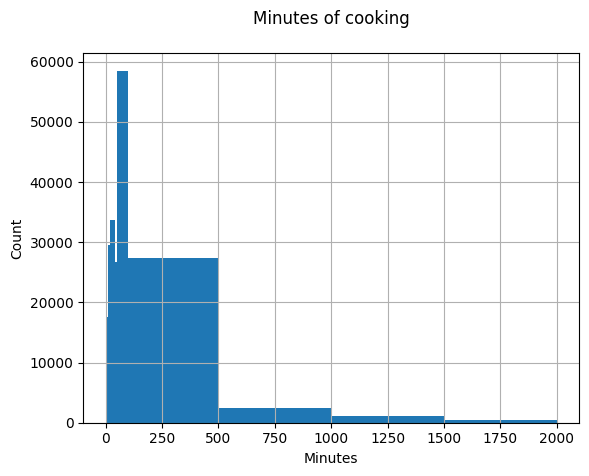

In [ ]:
recipes.minutes.hist(bins=[0, 10, 20, 30, 40, 50, 100,500,1000,1500,2000])
plt.title('Minutes of cooking\n')
plt.xlabel('Minutes')
plt.ylabel('Count')
#plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [ ]:
recipes.rename(columns = {'id':'recipe_id'}, inplace = True)

In [ ]:
df = pd.merge(ratings, recipes, on='recipe_id', how='inner')
# Take a look at the data
df.head()

,user_id,recipe_id,date,rating,u,i,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,2046,4684,2000-02-25,5.0,22095,44367,flank steak with lime chipotle sauce,75,1533,1999-11-18,"['time-to-make', 'course', 'main-ingredient', ...","[487.8, 16.0, 283.0, 13.0, 52.0, 20.0, 26.0]",6,"['mix honey with chilies , mustard , lime juic...",yum,"['flank steaks', 'honey', 'chipotle chiles in ...",10
1,12882,4684,2002-03-13,5.0,10399,44367,flank steak with lime chipotle sauce,75,1533,1999-11-18,"['time-to-make', 'course', 'main-ingredient', ...","[487.8, 16.0, 283.0, 13.0, 52.0, 20.0, 26.0]",6,"['mix honey with chilies , mustard , lime juic...",yum,"['flank steaks', 'honey', 'chipotle chiles in ...",10
2,37758,4684,2002-06-17,5.0,4954,44367,flank steak with lime chipotle sauce,75,1533,1999-11-18,"['time-to-make', 'course', 'main-ingredient', ...","[487.8, 16.0, 283.0, 13.0, 52.0, 20.0, 26.0]",6,"['mix honey with chilies , mustard , lime juic...",yum,"['flank steaks', 'honey', 'chipotle chiles in ...",10
3,37636,4684,2003-05-08,5.0,831,44367,flank steak with lime chipotle sauce,75,1533,1999-11-18,"['time-to-make', 'course', 'main-ingredient', ...","[487.8, 16.0, 283.0, 13.0, 52.0, 20.0, 26.0]",6,"['mix honey with chilies , mustard , lime juic...",yum,"['flank steaks', 'honey', 'chipotle chiles in ...",10
4,54697,4684,2003-06-30,5.0,1147,44367,flank steak with lime chipotle sauce,75,1533,1999-11-18,"['time-to-make', 'course', 'main-ingredient', ...","[487.8, 16.0, 283.0, 13.0, 52.0, 20.0, 26.0]",6,"['mix honey with chilies , mustard , lime juic...",yum,"['flank steaks', 'honey', 'chipotle chiles in ...",10


In [ ]:
df.isnull().sum()

user_id               0
recipe_id             0
date                  0
rating                0
u                     0
i                     0
name                  0
minutes               0
contributor_id        0
submitted             0
tags                  0
nutrition             0
n_steps               0
steps                 0
description       14274
ingredients           0
n_ingredients         0
dtype: int64

In [ ]:
agg_ratings = df.groupby('name').agg(mean_rating = ('rating', 'mean'), number_of_ratings = ('rating', 'count')).reset_index()
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>50]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 39 to 159940
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1160 non-null   object 
 1   mean_rating        1160 non-null   float64
 2   number_of_ratings  1160 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.2+ KB


In [ ]:
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,name,mean_rating,number_of_ratings
147889,to die for crock pot roast,4.413382,1091
45104,crock pot chicken with black beans cream cheese,4.346977,1075
155875,whatever floats your boat brownies,4.608696,897
42779,creamy cajun chicken pasta,4.691275,894
81650,kittencal s italian melt in your mouth meatballs,4.777637,787


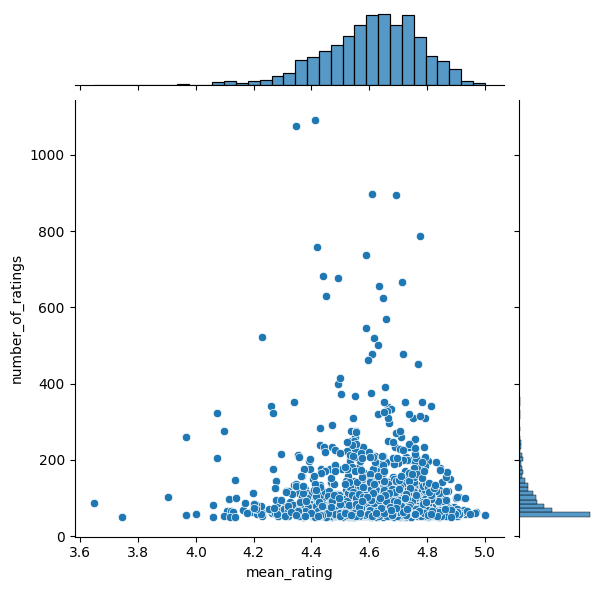

In [ ]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

In [ ]:
df_GT100 = pd.merge(df, agg_ratings_GT100[['name']], on='name', how='inner')
df_GT100.info()
df_GT100.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128756 entries, 0 to 128755
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         128756 non-null  int64  
 1   recipe_id       128756 non-null  int64  
 2   date            128756 non-null  object 
 3   rating          128756 non-null  float64
 4   u               128756 non-null  int64  
 5   i               128756 non-null  int64  
 6   name            128756 non-null  object 
 7   minutes         128756 non-null  int64  
 8   contributor_id  128756 non-null  int64  
 9   submitted       128756 non-null  object 
 10  tags            128756 non-null  object 
 11  nutrition       128756 non-null  object 
 12  n_steps         128756 non-null  int64  
 13  steps           128756 non-null  object 
 14  description     126644 non-null  object 
 15  ingredients     128756 non-null  object 
 16  n_ingredients   128756 non-null  int64  
dtypes: float64

,user_id,recipe_id,date,rating,u,i,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,2046,13307,2000-05-21,5.0,22095,134551,neiman marcus 250 chocolate chip cookies recipe,36,20914,2001-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[175.7, 14.0, 55.0, 5.0, 5.0, 22.0, 7.0]",7,['measure oatmeal and blend in a blender to a ...,i received this recipe from a friend,"['butter', 'flour', 'baking soda', 'sugar', 'b...",13
1,43505,13307,2002-08-08,5.0,5962,134551,neiman marcus 250 chocolate chip cookies recipe,36,20914,2001-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[175.7, 14.0, 55.0, 5.0, 5.0, 22.0, 7.0]",7,['measure oatmeal and blend in a blender to a ...,i received this recipe from a friend,"['butter', 'flour', 'baking soda', 'sugar', 'b...",13
2,61105,13307,2002-11-25,5.0,4526,134551,neiman marcus 250 chocolate chip cookies recipe,36,20914,2001-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[175.7, 14.0, 55.0, 5.0, 5.0, 22.0, 7.0]",7,['measure oatmeal and blend in a blender to a ...,i received this recipe from a friend,"['butter', 'flour', 'baking soda', 'sugar', 'b...",13
3,31611,13307,2002-12-01,5.0,2008,134551,neiman marcus 250 chocolate chip cookies recipe,36,20914,2001-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[175.7, 14.0, 55.0, 5.0, 5.0, 22.0, 7.0]",7,['measure oatmeal and blend in a blender to a ...,i received this recipe from a friend,"['butter', 'flour', 'baking soda', 'sugar', 'b...",13
4,50778,13307,2002-12-05,5.0,3894,134551,neiman marcus 250 chocolate chip cookies recipe,36,20914,2001-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[175.7, 14.0, 55.0, 5.0, 5.0, 22.0, 7.0]",7,['measure oatmeal and blend in a blender to a ...,i received this recipe from a friend,"['butter', 'flour', 'baking soda', 'sugar', 'b...",13


In [ ]:
# Number of users
print('The ratings dataset has', df_GT100['user_id'].nunique(), 'unique users')
# Number of recipes

print('The ratings dataset has', df_GT100['recipe_id'].nunique(), 'unique recipes')
# Number of ratings
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(df_GT100['rating'].unique()))

The ratings dataset has 20188 unique users
The ratings dataset has 1191 unique recipes
The ratings dataset has 6 unique ratings
The unique ratings are [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [ ]:
# Create user-item matrix

matrix = df_GT100.pivot_table(index='user_id', columns='name', values='rating')
matrix.head()

name,1 hour ham and bean soup,1 pan fudge cake,100 whole wheat blueberry muffins,2 handed kitchen sink tomato sandwich,20 minute creamy pesto chicken and bow ties,24k carrots,4 minute spicy garlic shrimp,40 minute hamburger buns,4th of july grilled salmon or chicken,5 minute vegan pancakes,...,yummy crispy baked fish,yummy crunchy apple pie,yummy oatmeal chocolate chip cookies,zesty italian crescent casserole,zesty low fat chicken breasts,zesty oven baked fries,zucchini chocolate cake,zucchini lasagna lasagne low carb,zucchini or yellow squash casserole,zucchini salsa canned
user_id,,,,,,,,,,,,,,,,,,,,,
1533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_recipe_features = matrix.copy().fillna(0)

In [ ]:
R = df_recipe_features.values
print(R)
user_ratings_mean = np.mean(R, axis = 1)

R_demeaned = R - user_ratings_mean.reshape(-1, 1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [ ]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_recipe_features.columns)
preds_df.loc[[1535]]

name,1 hour ham and bean soup,1 pan fudge cake,100 whole wheat blueberry muffins,2 handed kitchen sink tomato sandwich,20 minute creamy pesto chicken and bow ties,24k carrots,4 minute spicy garlic shrimp,40 minute hamburger buns,4th of july grilled salmon or chicken,5 minute vegan pancakes,...,yummy crispy baked fish,yummy crunchy apple pie,yummy oatmeal chocolate chip cookies,zesty italian crescent casserole,zesty low fat chicken breasts,zesty oven baked fries,zucchini chocolate cake,zucchini lasagna lasagne low carb,zucchini or yellow squash casserole,zucchini salsa canned
1535,0.194873,0.043109,-0.008934,0.343174,0.091379,0.066223,0.874062,0.336059,-0.06021,-0.08357,...,-0.074976,4.322962,0.000113,0.398594,0.173143,0.606261,0.032352,-0.10325,0.071865,0.087302


In [ ]:
df_recipes = recipes[['recipe_id','name']].copy()
df_ratings = ratings[['user_id','recipe_id','rating']].copy()
df_recipes = df_recipes.drop_duplicates()
df_ratings = df_ratings.drop_duplicates()
df_recipes.head()


,recipe_id,name
0,137739,arriba baked winter squash mexican style
1,31490,a bit different breakfast pizza
2,112140,all in the kitchen chili
3,59389,alouette potatoes
4,44061,amish tomato ketchup for canning


In [ ]:
def recommend_movies(preds_df, userID, recipes_df, original_ratings_df, num_recommendations=5):
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False)
    user_data = original_ratings_df[original_ratings_df.user_id == (userID)]
    user_full = user_data.merge(recipes_df).sort_values(['rating'],ascending = False)
    #user_full = (user_data.merge(recipes_df, how = 'right', left_on = 'recipe_id', right_on = 'recipe_id').
                     #sort_values(['rating'], ascending=False))

    recommendations = (recipes_df[~recipes_df['recipe_id'].isin(user_full['recipe_id'])]).merge(pd.DataFrame(sorted_user_predictions).reset_index()).rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations]


    return user_full , recommendations



In [ ]:
already_rated , predictions = recommend_movies(preds_df, 1535, df_recipes, df_ratings, 10)

In [ ]:
already_rated.head(10)

,user_id,recipe_id,rating,name
0,1535,80147,5.0,nutty graham picnic cake
378,1535,12662,5.0,bacon and potato chowder
396,1535,97952,5.0,cupcake brownies ww
393,1535,120800,5.0,authentic watergate salad
392,1535,14406,5.0,harry s coffee break cinnamon cake
391,1535,86433,5.0,nachos in a bowl
390,1535,100650,5.0,s mores parfaits
388,1535,107396,5.0,seet s super rich banana nut muffins
386,1535,89703,5.0,kansas city steak and vegetable soup
385,1535,91353,5.0,triple chocolate banana muffins


In [ ]:
predictions

,recipe_id,name,Predictions
1124,9272,wonderful salsa,1.355500
16,28768,absolute best ever lasagna,0.530550
574,15411,impossible peanut butter cookies,0.524511
1133,31128,yummy crunchy apple pie,0.518457
396,90674,denny s style french toast,0.470930
308,71373,country white bread or dinner rolls bread mac...,0.456296
1035,31750,the best ever waffles,0.399153
1091,114392,ultimate pizza sauce,0.371697
781,49387,oven fried eggplant aubergine,0.317685
1031,73166,the best chili you will ever taste,0.315251
